In [31]:
import pandas as pd
import numpy as np

df = pd.read_csv('NYC_Restaurants.csv', dtype=str)


In [32]:
df['RESTAURANT']=df['DBA']+' '+df['BUILDING']+' '+df['STREET']+' '+df['ZIPCODE']+' '+df['BORO']
#df[0:10] #uncomment for hw

In [40]:
df['RESTAURANT'].nunique()

10114

In [58]:
df['ADDRESS'] = df['BUILDING']+' '+df['STREET']+' '+df['ZIPCODE']+' '+df['BORO']

df['ADDRESS'] = df['ADDRESS'].drop_duplicates()
m1 = df[['DBA', 'ADDRESS']].dropna(subset = ['ADDRESS'])
m2 = m1['DBA'].value_counts() 
chains = m2[m2 > 1]
print(m2)
numChains = len(chains)
numChains
df[:20]

SUBWAY                        134
MCDONALD'S                     79
STARBUCKS COFFEE               70
DUNKIN' DONUTS                 64
DUNKIN DONUTS                  60
                             ... 
G'S HOMESTYLE COOKING           1
Steinway Pizza Restaurant       1
THANH DA                        1
SAKURA JAPENESE RESTAURANT      1
TESHIGOTOYA                     1
Name: DBA, Length: 8419, dtype: int64


,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,...,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT,ADDRESS,COUNT
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,469 FLATBUSH AVENUE 11225 BROOKLYN,NaN
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,NaN,NaN
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,NaN,NaN
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,NaN,NaN
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,NaN,NaN
5,5,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,Hot food item not held at or above 140º F.,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS,97-22 63 ROAD 11374 QUEENS,NaN
6,6,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,Personal cleanliness inadequate. Outer garment...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS,NaN,NaN
7,7,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,Food not protected from potential source of co...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS,NaN,NaN
8,8,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,Non-food contact surface improperly constructe...,Not Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS,NaN,NaN
9,9,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369,7183350505,American,11/15/2014,...,Evidence of mice or live mice present in facil...,Critical,38,Z,11/15/2014,02/12/2015,Cycle Inspection / Re-inspection,BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...,8825 ASTORIA BOULEVARD 11369 QUEENS,NaN


In [24]:
topChains = m2[:20]
#topChains.plot(kind='bar')

In [30]:
chainSum = sum(m2)
chainPct = chainSum/df['RESTAURANT'].nunique()
chainPct

0.1553292465888867

<AxesSubplot:>

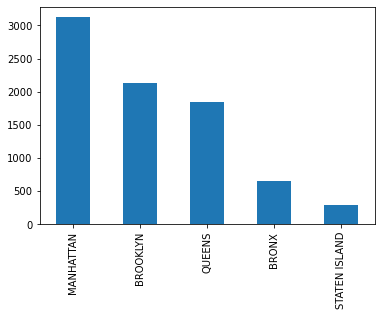

In [59]:
notChains = m2[m2 == 1]
notChainNames = notChains.index
df_2 = df.loc[df['DBA'].isin(notChainNames)]
df_2 = df_2[['DBA', 'BORO']]
df_2['DBA'] = df_2['DBA'].drop_duplicates()
df_2 = df_2.dropna(subset = ['DBA'])
#df_2 = df_2['BORO' != 'Missing']
m3 = df_2['BORO'].value_counts()
m3 = m3[m3.index != 'Missing']
m3.plot(kind = 'bar')

<AxesSubplot:>

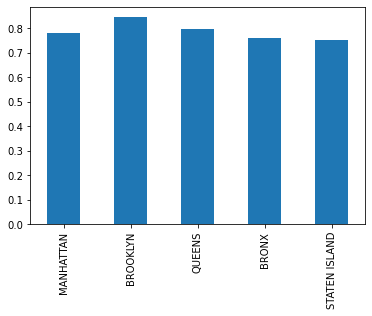

In [65]:
temp = df.drop_duplicates(subset = 'RESTAURANT')
temp
boro_counts = temp['BORO'].value_counts()
boro_counts = boro_counts[boro_counts.index != 'Missing']
boro_counts
notChainPct = m3/boro_counts
notChainPct.plot(kind = 'bar')

<AxesSubplot:>

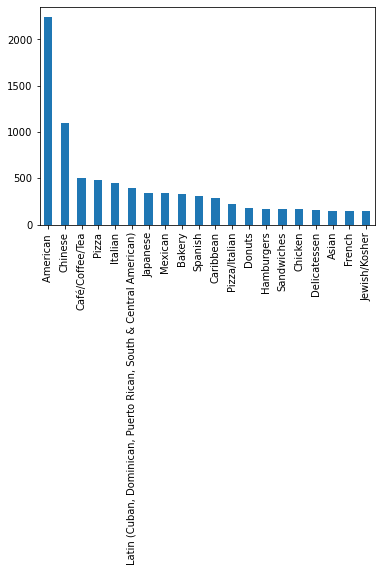

In [67]:
cuisine_ct = temp['CUISINE DESCRIPTION'].value_counts()
top_cuisine = cuisine_ct[:20]
top_cuisine.plot(kind = 'bar')

                                              RESTAURANT  \
30     GLORIOUS FOOD 522 EAST   74 STREET 10021 MANHA...   
76     TEXAS ROTISSERIE 94 FULTON STREET 10038 MANHATTAN   
121    NOSTRAND DONUT SHOP 1449 NOSTRAND AVENUE 11226...   
131     LE PERIGORD 405 EAST   52 STREET 10022 MANHATTAN   
143    KING YUM RESTAURANT 181-08 UNION TURNPIKE 1136...   
...                                                  ...   
44527   CIMINNA CAFE 2224 HYLAN BLVD 10306 STATEN ISLAND   
44618  ROB & TONY'S PIZZERIA 6635       GRAND AVE    ...   
44621  Andy's Cuisine Restaurant 1444 WILLIAMSBRIDGE ...   
44628             EARLY 967 MANHATTAN AVE 11222 BROOKLYN   
44629          TESHIGOTOYA 432 E 13TH ST 10009 MANHATTAN   

                  CUISINE DESCRIPTION VIOLATION CODE  
30                          American             NaN  
76                            Chicken            NaN  
121                            Donuts            NaN  
131                            French            NaN  
143 

<AxesSubplot:>

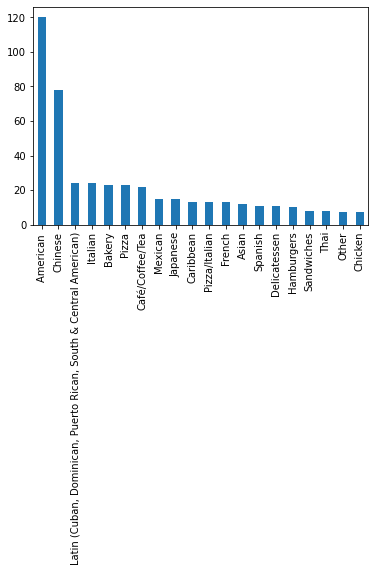

In [84]:
temp2 = df[['RESTAURANT', 'CUISINE DESCRIPTION', 'VIOLATION CODE']]
mask = temp2['VIOLATION CODE'].isnull()
temp2 = temp2[mask].drop_duplicates(subset = 'RESTAURANT')
print(temp2)
cuisine_ct2 = temp2['CUISINE DESCRIPTION'].value_counts()
top_cuisine2 = cuisine_ct2[:20]
top_cuisine2.plot(kind = 'bar')
#temp2

<AxesSubplot:>

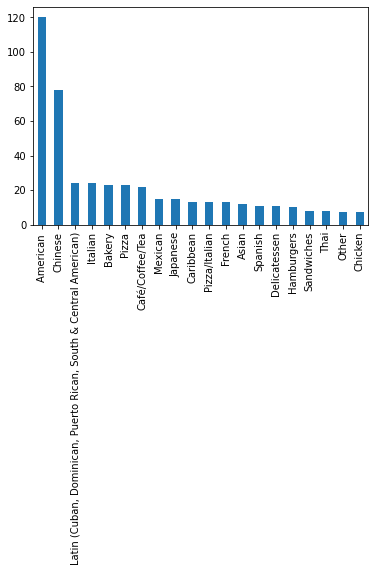

In [85]:
restaurant_cuisine = df[['RESTAURANT', 'CUISINE DESCRIPTION']]

mask = (df['VIOLATION CODE'].isnull())

df_working = restaurant_cuisine[mask].drop_duplicates()

df_working['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind='bar')

In [102]:
df['INSPECTION'] = df['RESTAURANT'] + ' ' + df['INSPECTION DATE']
temp3 = df[['CUISINE DESCRIPTION', 'VIOLATION CODE', 'INSPECTION']].drop_duplicates(subset = 'INSPECTION')

print(temp3)
count3 = temp3['CUISINE DESCRIPTION'].value_counts()
count3 = count3[count3 > 20]
len(count3)

                  CUISINE DESCRIPTION VIOLATION CODE  \
0                          Hamburgers            06C   
2                          Hamburgers            04H   
5                       Jewish/Kosher            02B   
9                           American             04L   
16                            Chinese            02B   
...                               ...            ...   
44622                         Chinese            02G   
44627                           Other            10F   
44628  Sandwiches/Salads/Mixed Buffet            NaN   
44629                        Japanese            NaN   
44630                        Japanese            04L   

                                              INSPECTION  
0      WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN 12/...  
2      WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN 11/...  
5      TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS ...  
9      BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...  
16     MAY MAY KITCHEN 1269 SUTT

54

In [106]:
over_20_inspecs = df[df["CUISINE DESCRIPTION"].map(df['CUISINE DESCRIPTION'].value_counts() > 20)]
clean_mask = over_20_inspecs['VIOLATION CODE'].isnull()

over_20_and_clean = over_20_inspecs['CUISINE DESCRIPTION'][clean_mask].value_counts()
len(over_20_and_clean)
#over_20_inspecs['CUISINE DESCRIPTION'].value_counts()

54